In [1]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 16 March 2018.
#plot librating ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass

r.shape =  (501, 2, 101)
total_ring_mass =  1.5e-10


In [3]:
#calculate da, de, dwt differences at inner & outer streamline's periapse
from libration import *
da, de, dwt, a_avg, e_avg = calculate_deltas(r, a, e, wt)

In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

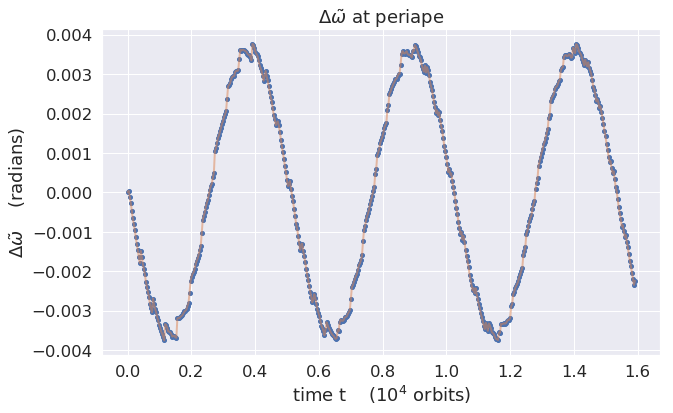

In [5]:
#plot dwt versus time
x = times/(2*np.pi)/1.0e4
y = dwt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'$\Delta\tilde{\omega}$ at periape')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')

In [6]:
#equilibrium de
de_eq = 0.5*(de.max() + de.min())
print 'de_eq = ', de_eq

de_eq =  0.0009052270438523907


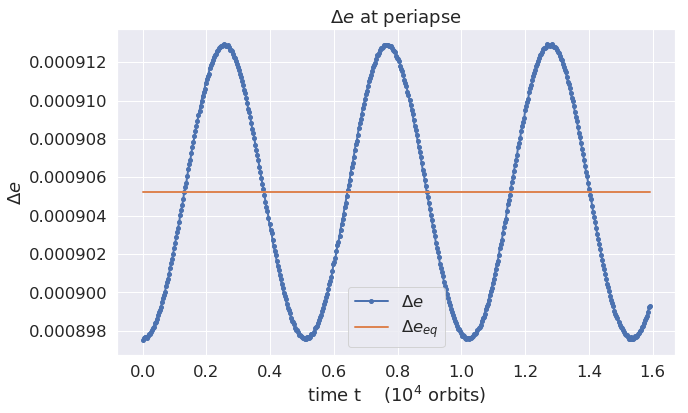

In [7]:
#plot delta_e versus time
x = times/(2*np.pi)/1.0e4
y = de
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = x*0 + de_eq
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e_{eq}$')
p = ax.set_title(r'$\Delta e$ at periapse')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

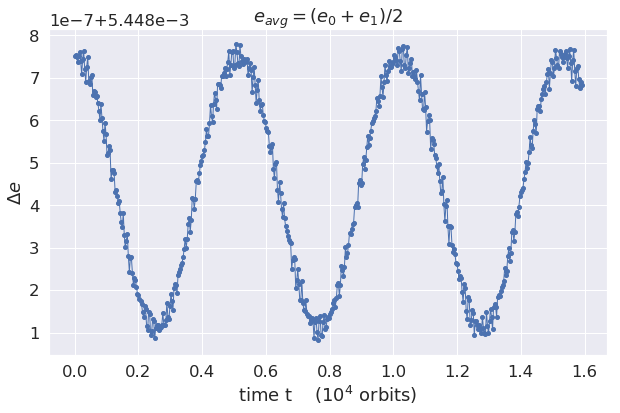

In [8]:
#plot e_avg versus time
x = times/(2*np.pi)/1.0e4
y = e_avg
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=1)
p = ax.set_title(r'$e_{avg} = (e_0+e_1)/2$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')

In [9]:
#lowest-order q2 and H(q2)
H, q2 = H_q2(a_avg, e_avg, da, de, dwt)
H_avg = 0.5*(H.min() + H.max())
q = np.sqrt(q2)

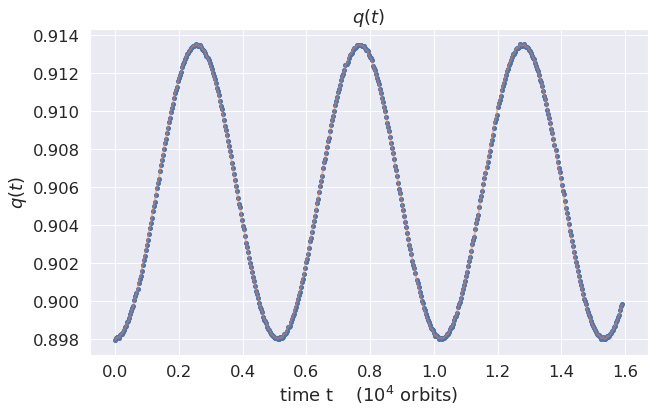

In [10]:
#plot q versus time
x = times/(2*np.pi)/1.0e4
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$q(t)$')

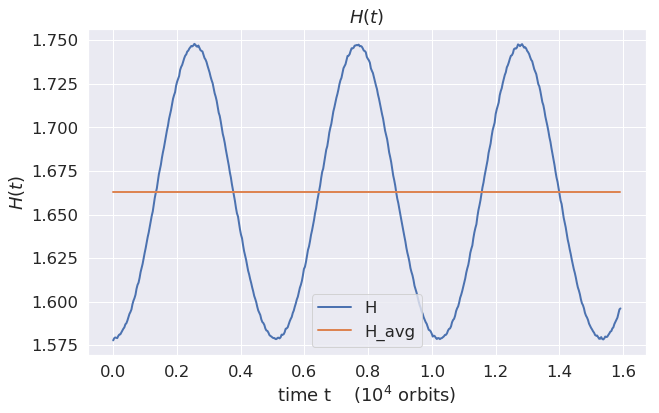

In [11]:
#plot H(q2) versus time
x = times/(2*np.pi)/1.0e4
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label='H')
y = x*0 + H_avg
p = ax.plot(x, y, linestyle='-', linewidth=2, label='H_avg')
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$H(t)$')
p = plt.legend()

In [12]:
#integral of motion from BGT
Ix = (de - de_eq)*a_avg/da
Iy = e_avg*a_avg*dwt/da
I = np.sqrt(Ix**2 + Iy**2)
print 'I.mean() = ', I.mean()

I.mean() =  0.014151204528178314


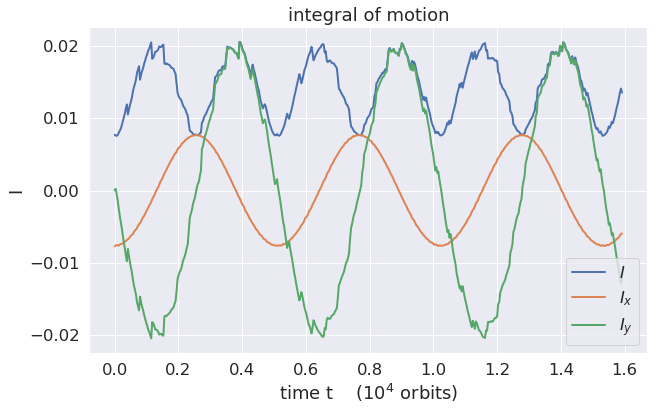

In [13]:
#plot I versus time
x = times/(2*np.pi)/1.0e4
y = I
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$I$')
p = ax.plot(x, Ix, linestyle='-', linewidth=2, label=r'$I_x$')
p = ax.plot(x, Iy, linestyle='-', linewidth=2, label=r'$I_y$')
p = ax.set_title(r'integral of motion')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel('I')
p = plt.legend()

In [14]:
#BGT's equilibrium de
M_central = 1.0
Ra = (Rp/a_avg).mean()
da_over_a = (da/a_avg).mean()
de_eq_bgt = (21.0/4)*np.pi*e_avg.mean()*J2*(M_central/total_ring_mass)*(Ra**2)\
    *(da_over_a**3)/H_avg
print 'equilibrium de_eq = ', de_eq
print 'equilibrium de_eq_bgt = ', de_eq_bgt

equilibrium de_eq =  0.0009052270438523907
equilibrium de_eq_bgt =  0.0008982300182705772


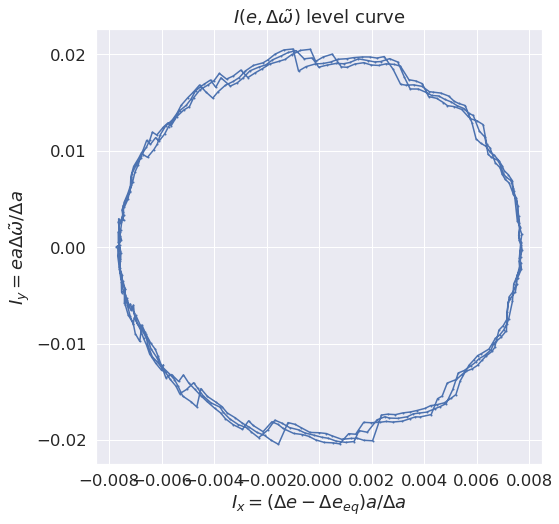

In [15]:
#plot (Ix, Iy)
f, ax = plt.subplots(figsize=(8, 8))
p = ax.set_title(r'$I(e, \Delta\tilde{\omega})$ level curve')
p = ax.set_xlabel(r'$I_x = (\Delta e - \Delta e_{eq})a/\Delta a$')
p = ax.set_ylabel(r'$I_y = ea\Delta\tilde{\omega}/\Delta a$')
x = Ix
y = Iy
p = ax.plot(x, y, marker='o', markersize=1, linestyle='-')

In [16]:
#BGT libration period
GM = 1.0
a3 = (a_avg**3).mean()
a_over_da = (a_avg/da).mean()
n = np.sqrt(GM/a3)
omega_bgt = (total_ring_mass/M_central)*(a_over_da**2)*n*H_avg/np.pi
T_bgt = 2*np.pi/omega_bgt
print 'BGT libration frequency = ', omega_bgt
print 'BGT libration period (10^4 orbits) = ', T_bgt/1.0e4

BGT libration frequency =  7.942805687281768e-05
BGT libration period (10^4 orbits) =  7.910536345161244


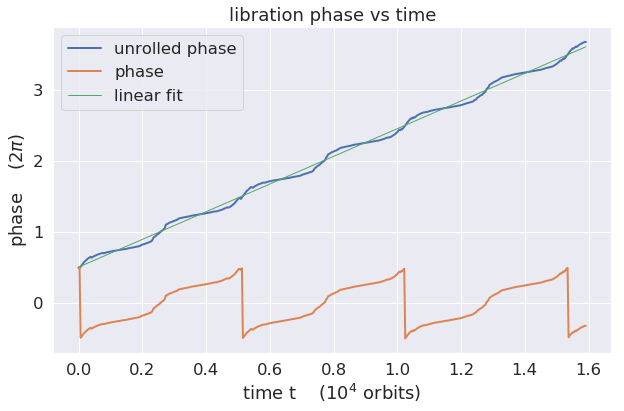

In [17]:
#compute libration phase & frequency
phase = np.arctan2(Iy, Ix)
phase_unrolled = unroll_angle(phase)
coeff = np.polyfit(times, phase_unrolled, 1)
omega = coeff[0]
phase_fit = coeff[1] + coeff[0]*times
x = times/(2*np.pi)/1.0e4
y = phase_unrolled/(2*np.pi)
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label='unrolled phase')
y = phase/(2*np.pi)
p = ax.plot(x, y, linestyle='-', linewidth=2, label='phase')
y = phase_fit/(2*np.pi)
p = ax.plot(x, y, linestyle='-', linewidth=1, label='linear fit')
p = ax.set_title('libration phase vs time')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'phase    ($2\pi$)')
p = plt.legend()

In [18]:
#simulation's libration frequency
T = 2*np.pi/omega
print 'omega, omega_bgt = ', omega, omega_bgt
print 'omega/omega_bgt = ', omega/omega_bgt
print 'T, T_bgt (10^5 orbits) = ', T/1.0e5, T_bgt/1.0e5

omega, omega_bgt =  0.00019504213711994128 7.942805687281768e-05
omega/omega_bgt =  2.4555823823343426
T, T_bgt (10^5 orbits) =  0.32214501953061236 0.7910536345161244


In [19]:
#estimated e_prime=a*(de/da) at the equilibrium fixed point
e_prime_equilibrium = (a_avg*de_eq/da).mean()
print 'e_prime_equilibrium = ', e_prime_equilibrium

e_prime_equilibrium =  0.9057500951697253
